In [21]:
import pandas as pd

In [22]:
#import data
data = pd.read_csv("scores_and_weather.csv")

In [23]:
data.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,09/02/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,09/03/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,09/04/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,09/09/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,09/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN


In [24]:
data.shape

(12404, 17)

In [25]:
#remove dome stadiums
data.drop(data[data.weather_detail == "DOME"].index, inplace=True) 

#remove blank values from weather_detail column
data.dropna(subset=["weather_temperature"], inplace=True)

In [26]:
data.shape

(9526, 17)

In [28]:
#create a total column out of home and away scores
data["total"] = (data.score_home + data.score_away)

In [74]:
#Look at some basic features of our dataset
print("Max temp:",data.weather_temperature.max())
print("Min temp:",data.weather_temperature.min())
print("Mean temp:",data.weather_temperature.mean())
print("Mean total:",data.total.mean())
print("Median temp:",data.weather_temperature.median())
print("Median total:",data.total.median())

Max temp: 95.0
Min temp: -6.0
Mean temp: 55.202281041532174
Mean total: 41.27206198880758
Median temp: 56.0
Median total: 41.0


In [32]:
#create 10 temperature definitions from the smallest to the largest values
#extended by .1% on each side to include the minimum and maximum values
data["temp_range"] = pd.cut(data.weather_temperature, bins=10, include_lowest=True)

In [51]:
#group by weather temp ranges
#totals
data.groupby(["weather_range"])["total"].count()

weather_range
(-6.104, 4.3]      18
(4.3, 14.6]        62
(14.6, 24.9]      185
(24.9, 35.2]      842
(35.2, 45.5]     1433
(45.5, 55.8]     1981
(55.8, 66.1]     2634
(66.1, 76.4]     1527
(76.4, 86.7]      764
(86.7, 97.0]       78
Name: total, dtype: int64

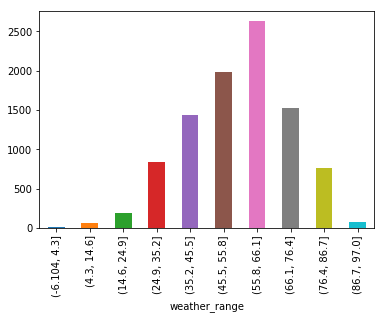

In [52]:
#total distribution
data.groupby(["weather_range"])["total"].count().plot(kind="bar")

In [41]:
#mean total
data.groupby(["weather_range"])["total"].mean().round()

weather_range
(-6.104, 4.3]    39.0
(4.3, 14.6]      39.0
(14.6, 24.9]     41.0
(24.9, 35.2]     40.0
(35.2, 45.5]     41.0
(45.5, 55.8]     42.0
(55.8, 66.1]     41.0
(66.1, 76.4]     42.0
(76.4, 86.7]     41.0
(86.7, 97.0]     42.0
Name: total, dtype: float64

In [40]:
#median total
data.groupby(["weather_range"])["total"].median()

weather_range
(-6.104, 4.3]    36.5
(4.3, 14.6]      37.0
(14.6, 24.9]     40.0
(24.9, 35.2]     40.0
(35.2, 45.5]     40.0
(45.5, 55.8]     41.0
(55.8, 66.1]     41.0
(66.1, 76.4]     41.0
(76.4, 86.7]     40.0
(86.7, 97.0]     44.0
Name: total, dtype: float64

C:\Users\Bill\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Bill\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


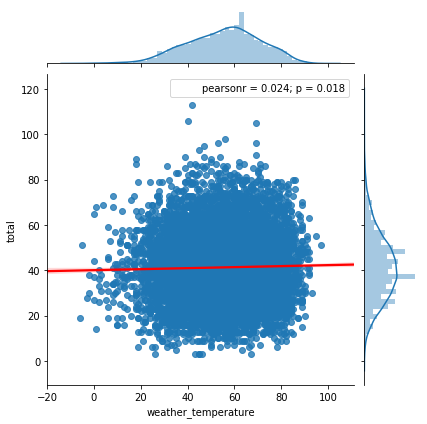

In [59]:
#plot data and look at regression
g = sns.jointplot(x="weather_temperature", y="total", data=data, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}})

In [61]:
#look at correlation
data.weather_temperature.corr(data.total)

0.02430412502394507

In [63]:
#finally, look at data that doesn't include notes such as snow, rain, etc.
#essentially isolated clear, cold games that are played outside
data = data[pd.isnull(data['weather_detail'])]

In [64]:
#group by weather temp ranges
#totals
data.groupby(["weather_range"])["total"].count()

weather_range
(-6.104, 4.3]      18
(4.3, 14.6]        60
(14.6, 24.9]      179
(24.9, 35.2]      822
(35.2, 45.5]     1402
(45.5, 55.8]     1939
(55.8, 66.1]     2580
(66.1, 76.4]     1490
(76.4, 86.7]      732
(86.7, 97.0]       70
Name: total, dtype: int64

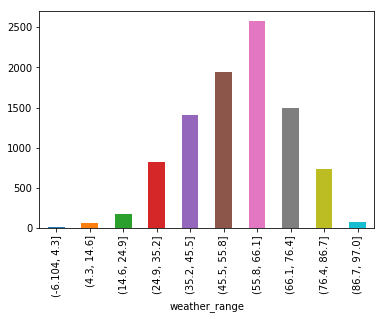

In [65]:
#total distribution
data.groupby(["weather_range"])["total"].count().plot(kind="bar")

In [66]:
#mean total
data.groupby(["weather_range"])["total"].mean().round()

weather_range
(-6.104, 4.3]    39.0
(4.3, 14.6]      39.0
(14.6, 24.9]     40.0
(24.9, 35.2]     40.0
(35.2, 45.5]     41.0
(45.5, 55.8]     41.0
(55.8, 66.1]     41.0
(66.1, 76.4]     42.0
(76.4, 86.7]     41.0
(86.7, 97.0]     42.0
Name: total, dtype: float64

In [67]:
#median total
data.groupby(["weather_range"])["total"].median()

weather_range
(-6.104, 4.3]    36.5
(4.3, 14.6]      37.0
(14.6, 24.9]     40.0
(24.9, 35.2]     40.0
(35.2, 45.5]     40.0
(45.5, 55.8]     41.0
(55.8, 66.1]     40.5
(66.1, 76.4]     41.0
(76.4, 86.7]     39.0
(86.7, 97.0]     44.0
Name: total, dtype: float64

C:\Users\Bill\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Bill\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


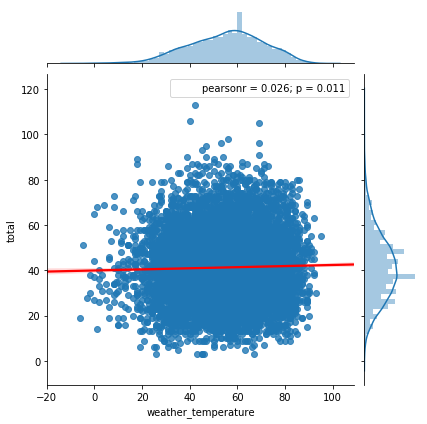

In [68]:
#plot data and look at regression
g = sns.jointplot(x="weather_temperature", y="total", data=data, kind='reg',
                  joint_kws={'line_kws':{'color':'red'}})

In [69]:
#look at correlation
data.weather_temperature.corr(data.total)

0.02639738227455743